In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
file_path= "ds_salaries.csv"
df = pd.read_csv(file_path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
encoder = LabelEncoder()
for col in ['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']:
    df[col] = encoder.fit_transform(df[col])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [8]:
scaler = StandardScaler()
df[['work_year','salary_in_usd','remote_ratio']] = scaler.fit_transform(df[['work_year','salary_in_usd','remote_ratio']])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0.905994,3,2,84,80000,7,-0.820391,26,1.105918,25,0
1,0.905994,2,0,66,30000,19,-1.706187,75,1.105918,70,2
2,0.905994,2,0,66,25500,19,-1.777563,75,1.105918,70,2
3,0.905994,3,2,47,175000,19,0.593676,11,1.105918,12,1
4,0.905994,3,2,47,120000,19,-0.278686,11,1.105918,12,1


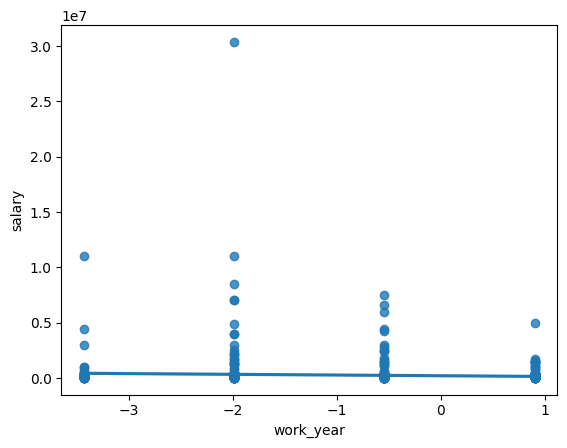

In [17]:
sns.regplot(data= df,x='work_year',y='salary')
plt.show()

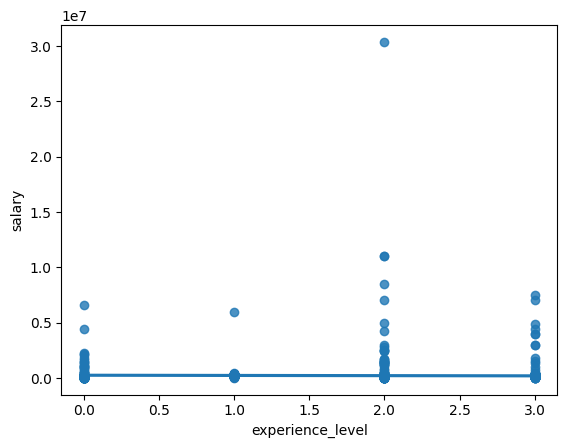

In [11]:
sns.regplot(data= df,y='salary',x='experience_level')
plt.show()

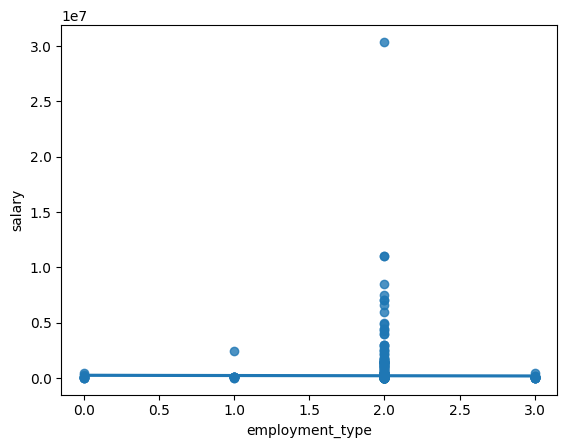

In [12]:
sns.regplot(data= df,y='salary',x='employment_type')
plt.show()

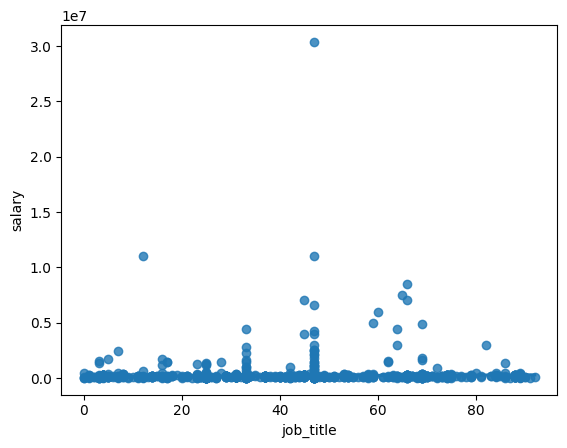

In [13]:
sns.regplot(data= df,y='salary',x='job_title')
plt.show()

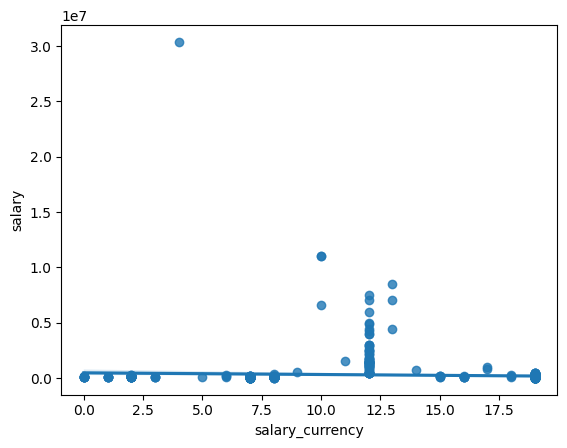

In [14]:
sns.regplot(data= df,y='salary',x='salary_currency')
plt.show()

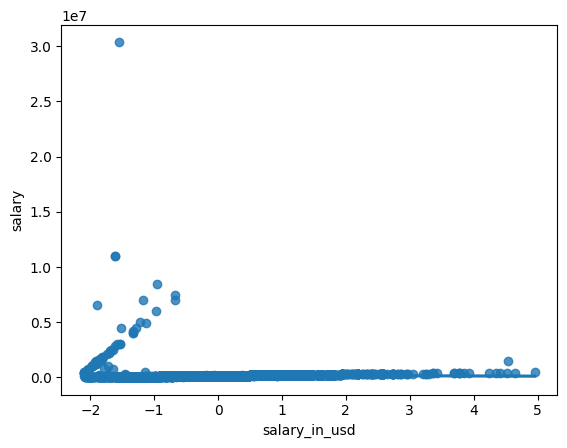

In [15]:
sns.regplot(data= df,y='salary',x='salary_in_usd')
plt.show()

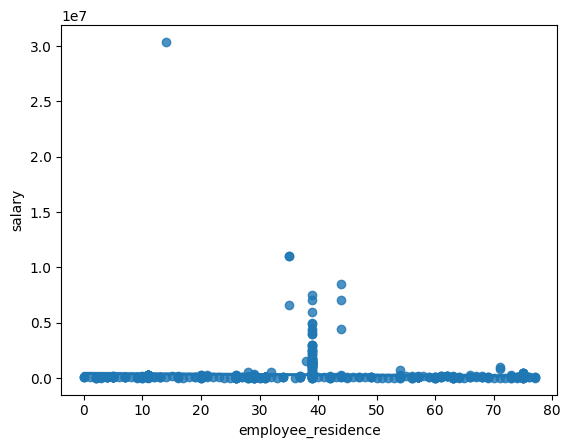

In [16]:
sns.regplot(data= df,y='salary',x='employee_residence')
plt.show()

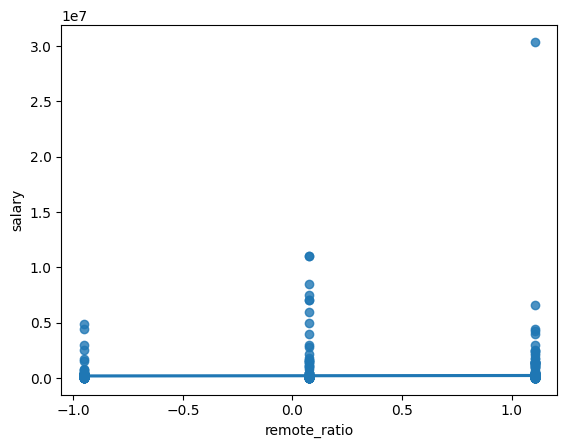

In [18]:
sns.regplot(data= df,y='salary',x='remote_ratio')
plt.show()

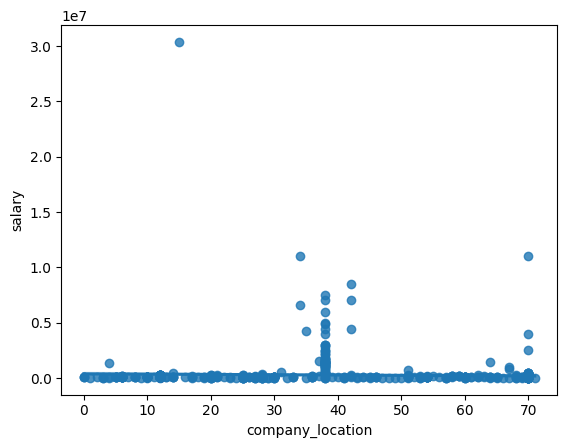

In [19]:
sns.regplot(data= df,y='salary',x='company_location')
plt.show()

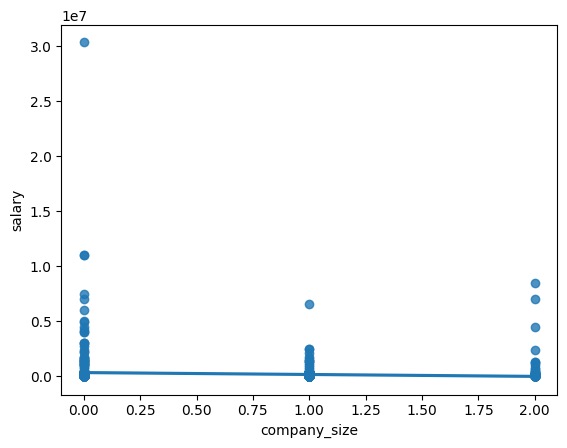

In [21]:
sns.regplot(data= df,y='salary',x='company_size')
plt.show()

In [23]:
X=df.drop(['salary'],axis=1)
y=df['salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

134638.03026277304

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(538559.92203024)

In [30]:
r2_score(y_test,y_pred)

0.039861226615963585

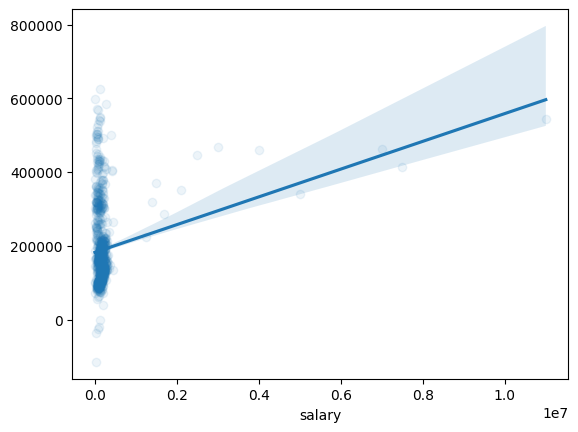

In [31]:
sns.regplot(x=y_test,y=y_pred,scatter_kws={'alpha':0.08})
plt.show()